In [6]:
import pandas as pd

# Importing the dataset
data = pd.read_csv('dataset.csv')

# Show the first rows of the dataset
data.head()


,date,Temperature,Humidity,Light,CO2
0,2/11/2015 14:48,21.7600,31.133333,437.333333,1029.666667
1,2/11/2015 14:49,21.7900,31.000000,437.333333,1000.000000
2,2/11/2015 14:50,21.7675,31.122500,434.000000,1003.750000
3,2/11/2015 14:51,21.7675,31.122500,439.000000,1009.500000
4,2/11/2015 14:51,21.7900,31.133333,437.333333,1005.666667


In [7]:
# Describe the dataset
data.describe()


,Temperature,Humidity,Light,CO2
count,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832
std,1.020693,3.952844,208.221275,297.096114
min,19.500000,21.865000,0.000000,484.666667
25%,20.290000,26.642083,0.000000,542.312500
50%,20.790000,30.200000,0.000000,639.000000
75%,21.533333,32.700000,208.250000,831.125000
max,24.390000,39.500000,1581.000000,2076.500000


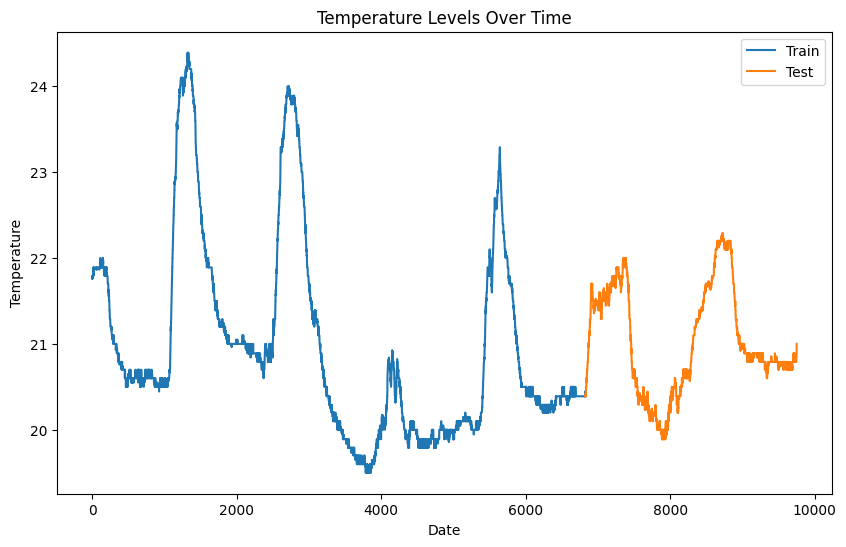

(-2.5765878382517236,
 0.09793326944800634,
 31,
 6794,
 {'1%': -3.4313128749529476,
  '5%': -2.8619655113430067,
  '10%': -2.5669964959454},
 -28175.334444708264)

In [8]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Split dataset into training and testing sets
train_size = int(len(data) * 0.7)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Check for stationarity in the CO2 data
adf_result = adfuller(train['Temperature'])

# Plot the temperature data
plt.figure(figsize=(10, 6))
plt.plot(train['Temperature'], label='Train')
plt.plot(test['Temperature'], label='Test')
plt.title('Temperature Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

adf_result


In [9]:
from pmdarima import auto_arima
import numpy as np

train = train["Temperature"]
# Use auto_arima to find the best ARIMA model for our data
auto_model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Display the summary of the best model found
auto_model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-28253.188, Time=2.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-27159.042, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-27867.278, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-27850.840, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-27160.791, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-28166.317, Time=0.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-27898.395, Time=2.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-28277.866, Time=2.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-28228.366, Time=2.27 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-28171.750, Time=3.21 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-28286.698, Time=2.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-28321.962, Time=2.82 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-28206.518, Time=2.86 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-28120.919, Time=3.89 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6826
Model:               SARIMAX(1, 1, 2)   Log Likelihood               14173.070
Date:                Thu, 07 Dec 2023   AIC                         -28338.140
Time:                        14:45:43   BIC                         -28310.826
Sample:                             0   HQIC                        -28328.716
                               - 6826                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9799      0.004    263.480      0.000       0.973       0.987
ma.L1         -1.3708      0.009   -159.455      0.000      -1.388      -1.354
ma.L2          0.4194      0.008     51.283      0.000       0.403       0.435
sigma2         0.0009   1.09e-05     84.609      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              1451.71
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

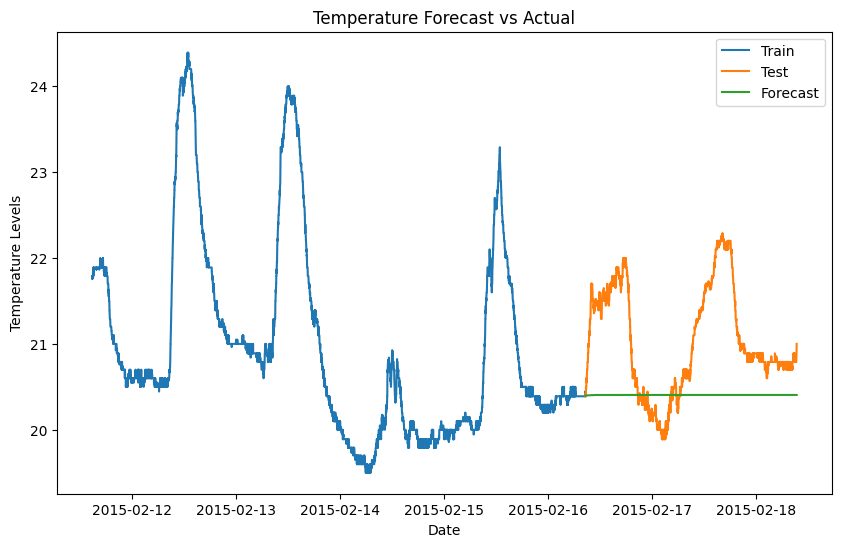

(2926,) (2926,)
Mean Absolute Error (MAE): 0.71


In [10]:
# Re-importing necessary libraries and re-loading the data due to execution state reset
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset again
data = pd.read_csv('dataset.csv', index_col='date')

data.index.freq = '1min'

data.index = pd.DatetimeIndex(data.index).to_period('1min')

temp_data = data['Temperature']

# Split the data into train and test sets (70% train, 30% test)
split_point = int(0.7 * len(temp_data))
train, test = temp_data[:split_point], temp_data[split_point:]

# Fit the ARIMA(2,1,2) model to the training data
model = ARIMA(train, order=(1,1,2))
fitted_model = model.fit()

# Make predictions on the test data
forecast = fitted_model.forecast(steps=len(test))

# Before plotting, convert the PeriodIndex back to DatetimeIndex
train.index = train.index.to_timestamp()
test.index = test.index.to_timestamp()
forecast.index = forecast.index.to_timestamp()

# Compare the forecasted values with the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title('Temperature Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature Levels')
plt.legend()
plt.show()

print(forecast.shape, test.shape)

# Mean Absolute Error (MAE)
MAE = np.mean(abs(forecast - test))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)))
